# EDA

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# EDA guide from past years: https://www.kaggle.com/dgawlik/house-prices-eda

In [65]:
# Display all columns of Dataframes
pd.set_option('display.max_columns', None)

(0, 100000000.0)

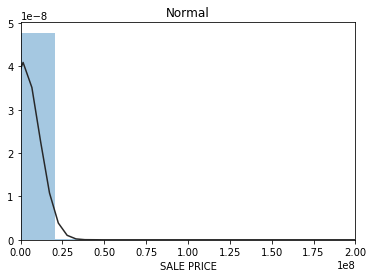

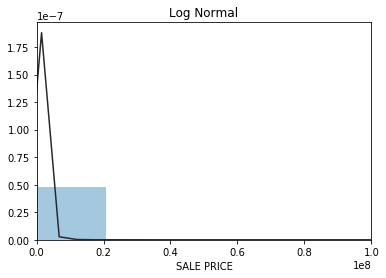

In [2]:
X_train = pd.read_csv("data/train_features.csv")
y_train = pd.read_csv("data/train_targets.csv")
X_test = pd.read_csv("data/test_features.csv")

#To remove categories that don't really relate that much to the sale price
X_train = X_train.drop('ADDRESS', axis=1)
X_price = y_train['SALE PRICE']

# To check the general distribution of sale prices
import scipy.stats as st

# plt.figure(1); plt.title('DistributionTest')
# sns.distplot(X_price, kde=False, fit=st.distributiontest)
plt.figure(2); plt.title('Normal')
sns.distplot(X_price, kde=False, fit=st.norm)
plt.xlim(left = 0, right = 2e8)
plt.figure(3); plt.title('Log Normal')
sns.distplot(X_price, kde=False, fit=st.lognorm)
plt.xlim(left = 0, right = 1e8)

In [68]:
# read data
X_train = pd.read_csv("data/train_features.csv")
y_train = pd.read_csv("data/train_targets.csv")
X_test = pd.read_csv("data/test_features.csv")

In [69]:
df = pd.concat((X_train, X_test), axis=0)
df = df.merge(right = y_train, on = "id")

In [35]:
df.columns

Index(['id', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE DATE', 'MEDIAN INCOME', 'MEAN INCOME', 'POPULATION',
       'SALE PRICE'],
      dtype='object')

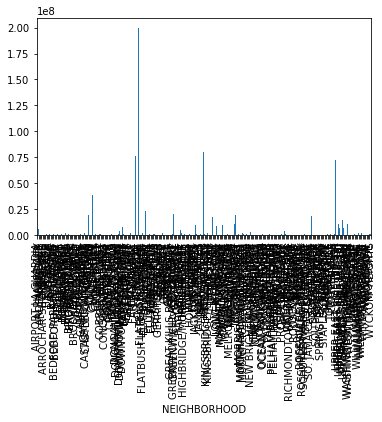

In [36]:
df.groupby(['NEIGHBORHOOD'])['SALE PRICE'].mean().plot.bar()

In [ ]:
df.groupby(['TAX CLASS AT PRESENT'])['SALE PRICE'].mean().plot.bar()

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df[df["SALE PRICE"] < 100000]["SALE PRICE"], bins = [x for x in range(1000, 100000, 3000)])
ax.set_xlim(0, 100000)
plt.show()

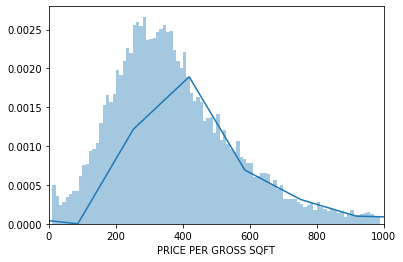

In [62]:
fig, ax = plt.subplots()
sns.distplot(df["PRICE PER GROSS SQFT"], bins = [x for x in range(10, 1000, 10)])
ax.set_xlim(0, 1000)
plt.show()

There is a spike at 999,999 and 1,000,000.

In [70]:
# drop rows with 0 gross or land sqft
df = df.drop(df[df["GROSS SQUARE FEET"] == 0].index)
df = df.drop(df[df["LAND SQUARE FEET"] == 0].index)


In [71]:
# create column price per sqft
df["PRICE PER GROSS SQFT"] = df["SALE PRICE"] / df["GROSS SQUARE FEET"]

(21920, 26)


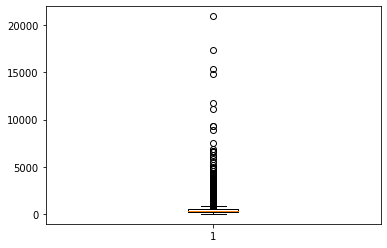

In [72]:
# boxplot before removing outliers
print(df.shape)
plt.boxplot(df["PRICE PER GROSS SQFT"]);

(20847, 26)


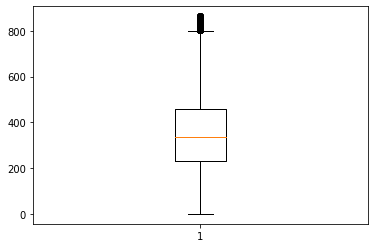

In [43]:
# remove outliers of price/sqft
q1 = df['PRICE PER GROSS SQFT'].quantile(.25)
q3 = df['PRICE PER GROSS SQFT'].quantile(.75)
iqr = q3 - q1

within_range = (q1 - 1.5*iqr <= df['PRICE PER GROSS SQFT']) & (df['PRICE PER GROSS SQFT'] <= q3 + 1.5*iqr)

df = df[within_range]
print(df.shape)
plt.boxplot(df['PRICE PER GROSS SQFT']);

In [73]:
df.sort_values("PRICE PER GROSS SQFT", ascending = True).tail(10)

,id,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,MEDIAN INCOME,MEAN INCOME,POPULATION,SALE PRICE,PRICE PER GROSS SQFT
7105,train7105,1,CLINTON,29 COMMERCIAL GARAGES,4,1094,11,,GW,638 WEST 47TH STREET,,10036,0,1,1,5021.0,2875.0,1940,4,GW,2017-07-18 00:00:00,62393.3306,89879.2860,18660,21500000.0,7478.260870
22419,train22419,1,UPPER EAST SIDE (79-96),14 RENTALS - 4-10 UNIT,2A,1548,146,,S9,310 EAST 86TH STREET,,10028,2,2,4,1788.0,4704.0,1915,2,S9,2017-02-27 00:00:00,105456.4514,192257.8020,40914,42000000.0,8928.571429
25553,train25553,1,MIDTOWN WEST,31 COMMERCIAL VACANT LAND,2,1270,45,,C7,12 WEST 55TH STREET,,10019,8,3,11,2008.0,8950.0,1920,4,V1,2017-08-22 00:00:00,84786.4665,133175.3716,39048,83000000.0,9273.743017
21855,train21855,3,WILLIAMSBURG-EAST,30 WAREHOUSES,4,2764,13,,E9,704 METROPOLITAN AVENUE,,11211,0,1,1,2500.0,2500.0,1950,4,E9,2017-05-10 00:00:00,37632.4577,52060.9141,84434,23250000.0,9300.000000
6760,train6760,1,JAVITS CENTER,21 OFFICE BUILDINGS,4,705,45,,O5,504-514 WEST 34TH STREET,,10001,0,1,1,9875.0,11250.0,1900,4,O5,2016-12-15 00:00:00,71244.6100,123112.7764,17678,124700000.0,11084.444444
12295,train12295,1,CIVIC CENTER,07 RENTALS - WALKUP APARTMENTS,2B,175,19,,C7,41 WHITE STREET,,10013,7,1,8,2633.0,12000.0,1915,2,C7,2017-07-13 00:00:00,69836.0955,137738.4104,24723,141500000.0,11791.666667
10198,train10198,3,FORT GREENE,29 COMMERCIAL GARAGES,4,2121,28,,G1,358 CLERMONT AVENUE,,11238,0,1,1,10000.0,500.0,1930,4,G1,2017-03-09 00:00:00,61468.5107,79249.3305,49085,7400000.0,14800.000000
4159,train4159,4,JAMAICA,29 COMMERCIAL GARAGES,4,9702,79,,GU,144-19 HILLSIDE AVENUE,,11435,0,1,1,8000.0,300.0,2006,4,GU,2017-02-14 00:00:00,44721.7965,52869.8387,47317,4600000.0,15333.333333
4313,train4313,1,MIDTOWN EAST,07 RENTALS - WALKUP APARTMENTS,2B,1369,35,,C4,428 EAST 58TH STREET,,10022,8,1,9,2058.0,4960.0,1900,2,C4,2017-03-16 00:00:00,93106.6559,158965.1780,26460,86000000.0,17338.709677
27721,train27721,1,HARLEM-CENTRAL,29 COMMERCIAL GARAGES,4,2013,44,,G5,122-124 WEST 145 STREET,,10039,0,1,1,13875.0,322.0,1972,4,G5,2016-12-22 00:00:00,28691.9104,37075.3337,21738,6750000.0,20962.732919


In [31]:
# This is an outlier: train17899
df[df["id"] == "train17899"]

,id,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,MEDIAN INCOME,MEAN INCOME,POPULATION,SALE PRICE,PRICE PER GROSS SQFT
17899,train17899,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,...,3750565.0,1972,2,D4,2017-07-05 00:00:00,57104.0,101012.0,2195,525000.0,0.139979


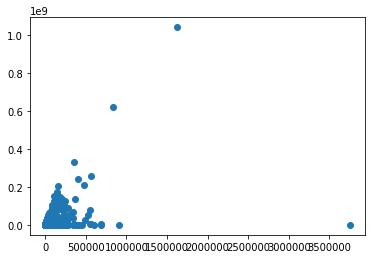

In [15]:
plt.scatter(x = df["GROSS SQUARE FEET"], y = df["SALE PRICE"])